<a href="https://colab.research.google.com/github/fowardelcac/Mercado-inmobilirario-cba/blob/main/Dataset/ZonaProp/2_seg_filtro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/fowardelcac/Mercado-inmobilirario-cba.git

fatal: destination path 'Mercado-inmobilirario-cba' already exists and is not an empty directory.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

In [3]:
df = pd.read_csv('/content/Mercado-inmobilirario-cba/Dataset/ZonaProp/ZonaProp.csv').drop('Unnamed: 0', axis=1)
df[['Divisa', 'Precio']] = df.Precio.str.split(' ', expand=True)
df['Precio'] = df['Precio'].str.replace(".", "", regex=False).str.replace(",", ".", regex=False)
df = df[~df['Precio'].str.contains(r'[a-zA-Z]')]
df['Precio'] = df['Precio'].astype(float)

df_sin_repetidos = df.drop_duplicates(subset=['Direccion', 'Precio', 'Barrio', 'Divisa'], keep='first')
df = df_sin_repetidos

df_filtrado = df.loc[(df.Divisa == '$') & (df.Precio >= 1000000)].copy()
df.loc[df_filtrado.index, 'Precio'] = df_filtrado.Precio / 519
df.loc[(df.Divisa == '$'), 'Divisa'] = 'USD'

df.loc[df.Barrio == 'Córdoba, Córdoba', 'Barrio'] = df.loc[df.Barrio == 'Córdoba, Córdoba', 'Direccion']
df.Barrio = df.Barrio + (', Provincia de Córdoba')
df.dropna(inplace=True)
df.Barrio = df.Barrio.str.lower()

df = df.drop(['Divisa'], axis=1).dropna()
patron = re.compile(r'(?:venta|casa|duplex|apto|credito|departamento|pileta|galeria|jardin)', flags=re.IGNORECASE)
ubicaciones_filtradas = df[df['Barrio'].str.contains(patron)]

indices_a_eliminar = ubicaciones_filtradas.index
df.drop(index=indices_a_eliminar, inplace=True)

<ipython-input-3-f40d3d7892ce>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Precio'] = df['Precio'].astype(float)


In [4]:
df.head()

,Precio,Direccion,Barrio
0,205000.0,Patagonia Village H - 23,"valle escondido , córdoba, provincia de córdoba"
1,26800.0,Ana Maria Janner al 1227,"general pueyrredón, córdoba, provincia de córdoba"
2,110000.0,El Oasis - Av Ghandi - Zona Valle Escondido,"nuevo urca, córdoba, provincia de córdoba"
3,670000.0,Lomas de la Carolina,"lomas de la carolina, córdoba, provincia de có..."
4,120000.0,Manantiales,"prados de manantiales, córdoba, provincia de c..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10015 entries, 0 to 13626
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Precio     10015 non-null  float64
 1   Direccion  10015 non-null  object 
 2   Barrio     10015 non-null  object 
dtypes: float64(1), object(2)
memory usage: 313.0+ KB


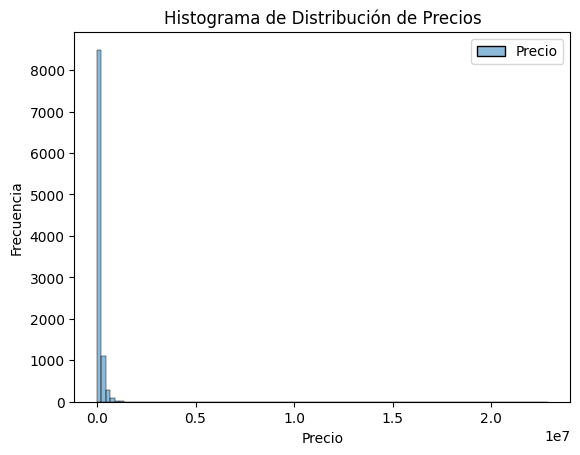

In [6]:
sns.histplot(df, bins=100, kde=False, color='skyblue', edgecolor='black')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Distribución de Precios')
plt.show()

In [7]:
df.Precio.describe()

count    1.001500e+04
mean     1.465497e+05
std      2.929181e+05
min      1.000000e+00
25%      6.000000e+04
50%      9.900000e+04
75%      1.690000e+05
max      2.286900e+07
Name: Precio, dtype: float64

In [8]:
baratas = df.loc[df.Precio.quantile(0.25) >= df.Precio]

In [9]:
bb = baratas.sort_values('Precio', ascending=True)
bb

,Precio,Direccion,Barrio
4423,1.0,Rondeau al 400,"nueva córdoba, córdoba, provincia de córdoba"
3853,1.0,AV Velez Sarsfield,"nueva córdoba, córdoba, provincia de córdoba"
1394,1.0,Ayacucho 361,"nueva córdoba, córdoba, provincia de córdoba"
6354,1.0,Hipolito Vieytes al 1300,"hipolito vieytes al 1300, provincia de córdoba"
6585,1.0,Claros DEL Bosque,"claros del bosque, córdoba, provincia de córdoba"
...,...,...,...
6762,60000.0,Independencia 890,"nueva córdoba, córdoba, provincia de córdoba"
11908,60000.0,Dpto. Zona Quinta Santa Ana,"alberdi, córdoba, provincia de córdoba"
12010,60000.0,Mendoza,"alta córdoba, córdoba, provincia de córdoba"
12041,60000.0,ARROYO DE LA CUESTA 1133,"arroyo de la cuesta 1133, provincia de córdoba"


In [10]:
baratas.describe()

,Precio
count,2645.000000
mean,43544.049630
std,11958.557791
min,1.000000
25%,35600.000000
50%,45000.000000
75%,53000.000000
max,60000.000000


In [11]:
valor_minimo_precio = 3500
df = df.drop(df[df['Precio'] <= valor_minimo_precio].index)

In [12]:
df.head()

,Precio,Direccion,Barrio
0,205000.0,Patagonia Village H - 23,"valle escondido , córdoba, provincia de córdoba"
1,26800.0,Ana Maria Janner al 1227,"general pueyrredón, córdoba, provincia de córdoba"
2,110000.0,El Oasis - Av Ghandi - Zona Valle Escondido,"nuevo urca, córdoba, provincia de córdoba"
3,670000.0,Lomas de la Carolina,"lomas de la carolina, córdoba, provincia de có..."
4,120000.0,Manantiales,"prados de manantiales, córdoba, provincia de c..."


In [13]:
caras = df.loc[df.Precio.quantile(0.75) <= df.Precio]
caras.sort_values('Precio', ascending=False)

,Precio,Direccion,Barrio
2451,22869000.0,Padre Alberione 6500,"villa rivera indarte, córdoba, provincia de có..."
12487,11111111.0,La Carolina 600,"la carolina 600, provincia de córdoba"
8183,3850000.0,Housing 24,"cerro de las rosas, córdoba, provincia de córdoba"
160,2500000.0,Casa a la Venta en Lomas de la Carolina Pensad...,"lomas de la carolina, córdoba, provincia de có..."
7878,2500000.0,Lomas de la Carolina,"lomas de la carolina, córdoba, provincia de có..."
...,...,...,...
4597,170000.0,MOCOVIES 7091,"argüello, córdoba, provincia de córdoba"
545,170000.0,O´higgins al 6100,"greenville ii, córdoba, provincia de córdoba"
3961,170000.0,Andrés Oliva 3500,"san fernando, córdoba, provincia de córdoba"
9938,170000.0,Pedro Goyena al 100,"alto alberdi, córdoba, provincia de córdoba"


In [14]:
indices = [2451, 12487, 8183]
df.drop(indices, inplace=True)

In [15]:
caras = df.loc[df.Precio.quantile(0.75) <= df.Precio]
caras.sort_values('Precio', ascending=False)

,Precio,Direccion,Barrio
52,2500000.0,Casa a la Venta en el Cerro de Las Rosas Sobre...,"cerro de las rosas, córdoba, provincia de córdoba"
7878,2500000.0,Lomas de la Carolina,"lomas de la carolina, córdoba, provincia de có..."
160,2500000.0,Casa a la Venta en Lomas de la Carolina Pensad...,"lomas de la carolina, córdoba, provincia de có..."
8824,1600000.0,Las Delicias,"las delicias, córdoba, provincia de córdoba"
7796,1500000.0,Lomas de la Carolina,"lomas de la carolina, córdoba, provincia de có..."
...,...,...,...
10529,170000.0,Av. Hipólito Yrigoyen 43,"nueva córdoba, córdoba, provincia de córdoba"
545,170000.0,O´higgins al 6100,"greenville ii, córdoba, provincia de córdoba"
8122,169990.0,Santa Rosa 630. 9no Piso. Córdoba Capital,"centro, córdoba, provincia de córdoba"
2019,169900.0,Greenville 2 M17 L1,"greenville ii, córdoba, provincia de córdoba"


In [16]:
df

,Precio,Direccion,Barrio
0,205000.0,Patagonia Village H - 23,"valle escondido , córdoba, provincia de córdoba"
1,26800.0,Ana Maria Janner al 1227,"general pueyrredón, córdoba, provincia de córdoba"
2,110000.0,El Oasis - Av Ghandi - Zona Valle Escondido,"nuevo urca, córdoba, provincia de córdoba"
3,670000.0,Lomas de la Carolina,"lomas de la carolina, córdoba, provincia de có..."
4,120000.0,Manantiales,"prados de manantiales, córdoba, provincia de c..."
...,...,...,...
13621,90000.0,Campillo 700,"cofico, córdoba, provincia de córdoba"
13623,322000.0,"Av, Pedro Laplace 5500","villa belgrano, córdoba, provincia de córdoba"
13624,93000.0,Manuel Moreno 950,"manuel moreno 950, provincia de córdoba"
13625,28000.0,Montevideo al 700,"observatorio, córdoba, provincia de córdoba"


In [17]:
def obtener_coordenadas(ubicacion):
    geolocator = Nominatim(user_agent="myGeocoder")
    try:
        location = geolocator.geocode(ubicacion, timeout=5)
        return (location.latitude, location.longitude) if location else (None, None)
    except GeocoderTimedOut:
        return obtener_coordenadas(ubicacion)

In [65]:
ubicaciones_unicas = df.groupby('Barrio').first().reset_index()
ubicaciones_unicas['Latitud'], ubicaciones_unicas['Longitud'] = zip(*ubicaciones_unicas['Barrio'].apply(obtener_coordenadas))

# Actualizar el DataFrame original con las coordenadas
df_ubic = df.merge(ubicaciones_unicas[['Barrio', 'Latitud', 'Longitud']], on='Barrio')

In [66]:
df_ubic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9973
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Precio     9974 non-null   float64
 1   Direccion  9974 non-null   object 
 2   Barrio     9974 non-null   object 
 3   Latitud    9302 non-null   float64
 4   Longitud   9302 non-null   float64
dtypes: float64(3), object(2)
memory usage: 467.5+ KB


In [67]:
df_ubic.to_csv('Df_nan.csv')

In [78]:
def ret_nan(df):
  #df.reset_index(drop=True, inplace=True)
  l = df[df.isnull().any(axis=1)]
  return l

data = pd.read_csv('Df_nan.csv').drop('Unnamed: 0', axis=1)
df = return_nan(data)

In [79]:
df

,Precio,Direccion,Barrio,Latitud,Longitud
1254,245000.0,AV. REPÚBLICA DE CHINA 1951,"el collado, valle escondido , provincia de cór...",NaN,NaN
1255,675000.0,Avenida Republica de China,"el collado, valle escondido , provincia de cór...",NaN,NaN
4893,145000.0,Complejo Maitei,"barrio privado chateau carreras, córdoba, prov...",NaN,NaN
4894,110000.0,Ramón Cárcano al 280,"barrio privado chateau carreras, córdoba, prov...",NaN,NaN
4895,690000.0,Costa Verde Country,"barrio privado chateau carreras, córdoba, prov...",NaN,NaN
...,...,...,...,...,...
9954,110000.0,San Martin y Andrea del Sarto Villa Carlos Paz,san martin y andrea del sarto villa carlos paz...,NaN,NaN
9955,600000.0,AV Ohiggins 8000,"av ohiggins 8000, provincia de córdoba",NaN,NaN
9964,230000.0,Av República de China al 1400,"la rosella villa, córdoba, provincia de córdoba",NaN,NaN
9966,175000.0,Chacritas Fabrisio Carrascul Esq.carlos Bunge,"chacritas fabrisio carrascul esq.carlos bunge,...",NaN,NaN


In [112]:
obtener_coordenadas('Tejas del Sur 3, córdoba, provincia de córdoba')

(-31.4623109, -64.1899159)

In [77]:
def cambiar_(df, barrio_buscado, nuevo_valor):
  df.loc[df['Barrio'] == barrio_buscado, 'Barrio'] = nuevo_valor
  return df

In [113]:
barrio_buscado = ['docta boulevard, docta, provincia de córdoba','siete soles naturaleza urbana, córdoba, provincia de córdoba', 'la cascada country golf, córdoba, provincia de córdoba', 'lomas de los carolinos, córdoba, provincia de córdoba', 'claros village, córdoba, provincia de córdoba']
nuevo_valor = ['docta, córdoba, provincia de córdoba', 'siete soles, córdoba, provincia de córdoba', 'la cascada, córdoba, provincia de córdoba', 'Lomas de la carolina, córdoba, provincia de córdoba', 'claros del bosque, córdoba, provincia de córdoba']

In [114]:
for barrio, nuevo in zip(barrio_buscado, nuevo_valor):
    df = cambiar_(df, barrio, nuevo)

In [126]:
data = df.copy()
data = data.filter(['Precio', 'Direccion', 'Barrio'], axis=1)

ubicaciones_unicas = data.groupby('Barrio').first().reset_index()
ubicaciones_unicas['Latitud'], ubicaciones_unicas['Longitud'] = zip(*ubicaciones_unicas['Barrio'].apply(obtener_coordenadas))

# Actualizar el DataFrame original con las coordenadas
df_d = df.merge(ubicaciones_unicas[['Barrio', 'Latitud', 'Longitud']], on='Barrio')

In [138]:
df_copy = df_d.copy()

# Ahora, renombra las columnas en la copia
df_copy.rename(columns={'Latitud_y': 'Latitud', 'Longitud_y': 'Longitud'}, inplace=True)
#df_copy.drop(['Latitud_y', 'Longitud_y'], axis=1)
df_copy

,Precio,Direccion,Barrio,Latitud_x,Longitud_x,Latitud,Longitud
0,245000.0,AV. REPÚBLICA DE CHINA 1951,"El Collado, Córdoba, Provincia de Córdoba",NaN,NaN,-31.366057,-64.281129
1,675000.0,Avenida Republica de China,"El Collado, Córdoba, Provincia de Córdoba",NaN,NaN,-31.366057,-64.281129
2,145000.0,Complejo Maitei,"chateau carreras, córdoba, provincia de córdoba",NaN,NaN,-31.385123,-64.258729
3,110000.0,Ramón Cárcano al 280,"chateau carreras, córdoba, provincia de córdoba",NaN,NaN,-31.385123,-64.258729
4,690000.0,Costa Verde Country,"chateau carreras, córdoba, provincia de córdoba",NaN,NaN,-31.385123,-64.258729
...,...,...,...,...,...,...,...
667,110000.0,San Martin y Andrea del Sarto Villa Carlos Paz,san martin y andrea del sarto villa carlos paz...,NaN,NaN,NaN,NaN
668,600000.0,AV Ohiggins 8000,"av ohiggins 8000, provincia de córdoba",NaN,NaN,NaN,NaN
669,230000.0,Av República de China al 1400,"la rosella villa, córdoba, provincia de córdoba",NaN,NaN,NaN,NaN
670,175000.0,Chacritas Fabrisio Carrascul Esq.carlos Bunge,"chacritas fabrisio carrascul esq.carlos bunge,...",NaN,NaN,NaN,NaN


In [142]:
data = df_copy.filter(['Precio', 'Direccion', 'Barrio', 'Latitud', 'Longitud'], axis=1).dropna()
ll = pd.read_csv('Df_nan.csv').drop('Unnamed: 0', axis=1).dropna()

data_final = pd.concat([data, ll], ignore_index=False)
data_final

,Precio,Direccion,Barrio,Latitud,Longitud
0,245000.0,AV. REPÚBLICA DE CHINA 1951,"El Collado, Córdoba, Provincia de Córdoba",-31.366057,-64.281129
1,675000.0,Avenida Republica de China,"El Collado, Córdoba, Provincia de Córdoba",-31.366057,-64.281129
2,145000.0,Complejo Maitei,"chateau carreras, córdoba, provincia de córdoba",-31.385123,-64.258729
3,110000.0,Ramón Cárcano al 280,"chateau carreras, córdoba, provincia de córdoba",-31.385123,-64.258729
4,690000.0,Costa Verde Country,"chateau carreras, córdoba, provincia de córdoba",-31.385123,-64.258729
...,...,...,...,...,...
9968,49000.0,"wenceslao tejerina 2280, Córdoba, Córdoba, Arg...","wenceslao tejerina 2280, córdoba, córdoba, arg...",-31.412764,-64.208289
9969,35000.0,naciones unidas 1055,"suárez, córdoba, provincia de córdoba",-31.440220,-64.210752
9970,69000.0,Villa Carlos Paz,"villa carlos paz, provincia de córdoba",-31.418377,-64.493698
9971,170000.0,Prado de Manantiales,"prado de manantiales, provincia de córdoba",-31.425643,-64.505889


In [143]:
data_final.to_csv('data_final.csv')